### Rain Prediction –Weather forecasting

### Importing Library

In [1]:
#data lib
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

#save

import warnings
warnings.filterwarnings('ignore')
import pickle

### Data Loading

In [2]:
pd.set_option('max_columns',30)
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2286,2015-07-17,Newcastle,5.1,NaN,0.0,NaN,NaN,NaN,NaN,NW,NW,9.0,28.0,83.0,55.0,NaN,NaN,8.0,7.0,7.2,13.0,No,Yes
7658,2013-01-23,PerthAirport,17.3,29.7,0.0,11.0,13.0,SW,48.0,SW,SW,17.0,28.0,45.0,40.0,1008.1,1007.4,1.0,1.0,26.2,28.2,No,No
7623,2012-11-18,PerthAirport,15.1,26.5,0.0,9.6,12.9,SW,50.0,WSW,SW,17.0,39.0,60.0,52.0,1007.7,1007.9,5.0,6.0,23.0,24.5,No,No
1898,2014-06-24,Newcastle,8.8,15.8,0.0,NaN,NaN,NaN,NaN,NW,NW,37.0,83.0,58.0,39.0,NaN,NaN,0.0,0.0,12.0,15.0,No,No
7801,2013-07-13,PerthAirport,5.6,20.9,0.0,0.6,8.0,NW,39.0,NNE,NNW,13.0,20.0,88.0,40.0,1017.8,1016.1,7.0,3.0,9.6,20.5,No,No
583,2010-07-07,Albury,1.5,13.5,0.0,NaN,NaN,NNE,50.0,NaN,WNW,0.0,7.0,99.0,64.0,1026.9,1025.1,7.0,NaN,3.0,12.6,No,No
896,2011-06-15,Albury,0.5,16.9,0.0,NaN,NaN,S,15.0,E,S,2.0,7.0,82.0,48.0,1027.0,1024.7,NaN,NaN,5.8,16.8,No,No
880,2011-05-30,Albury,3.6,15.9,0.0,NaN,NaN,SSE,26.0,NaN,ESE,0.0,11.0,76.0,51.0,1025.9,1023.2,NaN,NaN,8.7,15.8,No,No
7680,2013-03-14,PerthAirport,16.9,23.0,0.4,8.4,0.1,NaN,NaN,ESE,E,13.0,24.0,66.0,93.0,1014.8,1011.6,7.0,7.0,17.3,16.8,No,Yes
6267,2011-06-17,Brisbane,8.0,21.7,0.0,3.4,10.2,W,43.0,WSW,W,4.0,11.0,60.0,43.0,1014.1,1009.3,1.0,2.0,17.4,21.1,No,No


### Overview

In [3]:
data.shape

(8425, 23)

In [4]:
#checking for whitespace
data= data.apply(lambda x: x.str.strip() if x.dtypes == object else x)

### Null Testing

In [5]:
data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Sunshile & Evaporation are important features and have NaN around 50%. so we can't treat these many number as model can biased. so i decide to remove null basis of feature Sunshine. 

In [6]:
data=data.drop(data[data['Sunshine'].isnull()].index)

In [7]:
data.isna().sum()

Date               0
Location           0
MinTemp            2
MaxTemp            2
Rainfall         126
Evaporation       26
Sunshine           0
WindGustDir       70
WindGustSpeed     70
WindDir9am        72
WindDir3pm        17
WindSpeed9am       2
WindSpeed3pm       3
Humidity9am        3
Humidity3pm        6
Pressure9am        3
Pressure3pm        7
Cloud9am         370
Cloud3pm         403
Temp9am            3
Temp3pm            4
RainToday        126
RainTomorrow     125
dtype: int64

'RainTomorrow' is our target so we cant fill its null. so lets remove these observations. 

In [8]:
data=data.drop(data[data['RainTomorrow'].isna()].index)

In [9]:
data.isna().sum()

Date               0
Location           0
MinTemp            1
MaxTemp            1
Rainfall          66
Evaporation       25
Sunshine           0
WindGustDir       66
WindGustSpeed     66
WindDir9am        72
WindDir3pm        16
WindSpeed9am       2
WindSpeed3pm       2
Humidity9am        2
Humidity3pm        5
Pressure9am        3
Pressure3pm        6
Cloud9am         308
Cloud3pm         335
Temp9am            2
Temp3pm            3
RainToday         66
RainTomorrow       0
dtype: int64

for rest of the features 'Mean/median/mode' is not good idead. rather we can use bfill/ffill because weather most likely to be similar last day.

In [10]:
data.ffill(axis=0,inplace=True)

In [11]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

All null values fixed now, we can proceed now for further processing.

### Duplicate Test

In [12]:
data.duplicated().sum()

845

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

### Feature Testing-Numeric or Text

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3461 entries, 907 to 8385
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3461 non-null   object 
 1   Location       3461 non-null   object 
 2   MinTemp        3461 non-null   float64
 3   MaxTemp        3461 non-null   float64
 4   Rainfall       3461 non-null   float64
 5   Evaporation    3461 non-null   float64
 6   Sunshine       3461 non-null   float64
 7   WindGustDir    3461 non-null   object 
 8   WindGustSpeed  3461 non-null   float64
 9   WindDir9am     3461 non-null   object 
 10  WindDir3pm     3461 non-null   object 
 11  WindSpeed9am   3461 non-null   float64
 12  WindSpeed3pm   3461 non-null   float64
 13  Humidity9am    3461 non-null   float64
 14  Humidity3pm    3461 non-null   float64
 15  Pressure9am    3461 non-null   float64
 16  Pressure3pm    3461 non-null   float64
 17  Cloud9am       3461 non-null   float64
 18  Cloud3

In [16]:
#filtering non numeric features
for col in data.columns:
    if data[col].dtypes=='object':
        print(col)

Date
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


Date column showing as object .. first of all convert it into datetime then we can extract date/time/year from it.

In [17]:
data['Date']=data['Date'].astype('datetime64')

In [18]:
data['date-dt']=data['Date'].dt.day
data['date-month']=data['Date'].dt.month
data['date-year']=data['Date'].dt.year

as we have extracted data/month/year from date feature & create different features. so now we can remove orginal feature as we model don't accept datetime dtypes.

In [19]:
del data['Date']

In [20]:
data['Location'].value_counts()

PerthAirport    1200
Melbourne        750
CoffsHarbour     610
Brisbane         556
Darwin           250
Williamtown       95
Name: Location, dtype: int64

In [21]:
data['WindGustDir'].value_counts()

E      412
SW     347
N      338
WSW    282
S      242
ENE    226
SSW    201
W      194
SSE    190
SE     179
NNE    178
ESE    174
NE     166
NW     120
WNW    113
NNW     99
Name: WindGustDir, dtype: int64

In [22]:
data['WindDir9am'].value_counts()

SW     434
N      427
ENE    302
WSW    270
SSW    230
E      229
NNE    220
NE     186
S      184
W      180
SE     178
SSE    147
ESE    120
NNW    119
NW     118
WNW    117
Name: WindDir9am, dtype: int64

In [23]:
data['WindDir3pm'].value_counts()

S      326
WSW    309
SW     275
E      266
SSE    230
NE     227
N      221
ENE    220
W      217
ESE    208
SE     198
NNE    190
SSW    168
WNW    152
NNW    136
NW     118
Name: WindDir3pm, dtype: int64

In [24]:
data['RainToday'].value_counts()

No     2650
Yes     811
Name: RainToday, dtype: int64

In [25]:
data['RainTomorrow'].value_counts()

No     2649
Yes     812
Name: RainTomorrow, dtype: int64

Above 2 features having Binary classification so we can simple convert them with 1,0.

In [26]:
data['RainToday']=data['RainToday'].map({'Yes':1,'No':0})
data['RainTomorrow']=data['RainTomorrow'].map({'Yes':1,'No':0})

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3461 entries, 907 to 8385
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       3461 non-null   object 
 1   MinTemp        3461 non-null   float64
 2   MaxTemp        3461 non-null   float64
 3   Rainfall       3461 non-null   float64
 4   Evaporation    3461 non-null   float64
 5   Sunshine       3461 non-null   float64
 6   WindGustDir    3461 non-null   object 
 7   WindGustSpeed  3461 non-null   float64
 8   WindDir9am     3461 non-null   object 
 9   WindDir3pm     3461 non-null   object 
 10  WindSpeed9am   3461 non-null   float64
 11  WindSpeed3pm   3461 non-null   float64
 12  Humidity9am    3461 non-null   float64
 13  Humidity3pm    3461 non-null   float64
 14  Pressure9am    3461 non-null   float64
 15  Pressure3pm    3461 non-null   float64
 16  Cloud9am       3461 non-null   float64
 17  Cloud3pm       3461 non-null   float64
 18  Temp9a

Now we have 4 features in which we have dtypes as object and we have already analyse these features, so now best way to encode these features is one hot encoding.

In [28]:
data=pd.get_dummies(data,['Location','WindGustDir','WindDir9am','WindDir3pm'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3461 entries, 907 to 8385
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MinTemp                3461 non-null   float64
 1   MaxTemp                3461 non-null   float64
 2   Rainfall               3461 non-null   float64
 3   Evaporation            3461 non-null   float64
 4   Sunshine               3461 non-null   float64
 5   WindGustSpeed          3461 non-null   float64
 6   WindSpeed9am           3461 non-null   float64
 7   WindSpeed3pm           3461 non-null   float64
 8   Humidity9am            3461 non-null   float64
 9   Humidity3pm            3461 non-null   float64
 10  Pressure9am            3461 non-null   float64
 11  Pressure3pm            3461 non-null   float64
 12  Cloud9am               3461 non-null   float64
 13  Cloud3pm               3461 non-null   float64
 14  Temp9am                3461 non-null   float64
 15  Te

Dataset all clean now we can proceed further.

### Describe

In [30]:
pd.set_option('max_columns',75)
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date-dt,date-month,date-year,Location_Brisbane,Location_CoffsHarbour,Location_Darwin,Location_Melbourne,Location_PerthAirport,Location_Williamtown,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.00000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000
mean,14.105027,24.903207,3.006270,5.154608,7.932534,40.551575,15.778677,19.593470,63.704999,49.629876,1017.480208,1014.942184,3.983820,4.092170,19.224993,23.410864,0.234325,0.234614,15.758740,6.463739,2011.287778,0.160647,0.176250,0.072233,0.216700,0.346721,0.027449,0.119041,0.065299,0.050274,0.097660,0.047963,0.051430,0.028604,0.034672,0.069922,0.051719,0.054897,0.058076,0.10026,0.056053,0.032650,0.081479,0.066166,0.087258,0.034672,0.123375,0.053742,0.063565,0.034383,0.034094,0.053164,0.051430,0.042473,0.066455,0.125397,0.052008,0.033805,0.078012,0.076856,0.063565,0.060098,0.063854,0.065588,0.054897,0.039295,0.034094,0.094192,0.057209,0.066455,0.048541,0.079457,0.062699,0.043918,0.089281
std,5.266644,5.901606,12.097043,3.342124,3.771477,13.780296,9.524329,8.813433,16.740969,18.011837,6.383067,6.329020,2.790938,2.656087,5.451047,5.772619,0.423638,0.423819,8.809079,3.369649,1.487848,0.367258,0.381087,0.258911,0.412056,0.475995,0.163411,0.323883,0.247088,0.218542,0.296897,0.213719,0.220906,0.166716,0.182974,0.255052,0.221491,0.227813,0.233920,0.30039,0.230058,0.177743,0.273609,0.248608,0.282254,0.182974,0.328914,0.225540,0.244012,0.182238,0.181497,0.224392,0.220906,0.201695,0.249111,0.331217,0.222075,0.180754,0.268229,0.266402,0.244012,0.237703,0.244529,0.247596,0.227813,0.194324,0.181497,0.292138,0.232275,0.249111,0.214937,0.270489,0.242455,0.204942,0.285189
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

dataset looks good to proceed.
all features have equal count.

<AxesSubplot:>

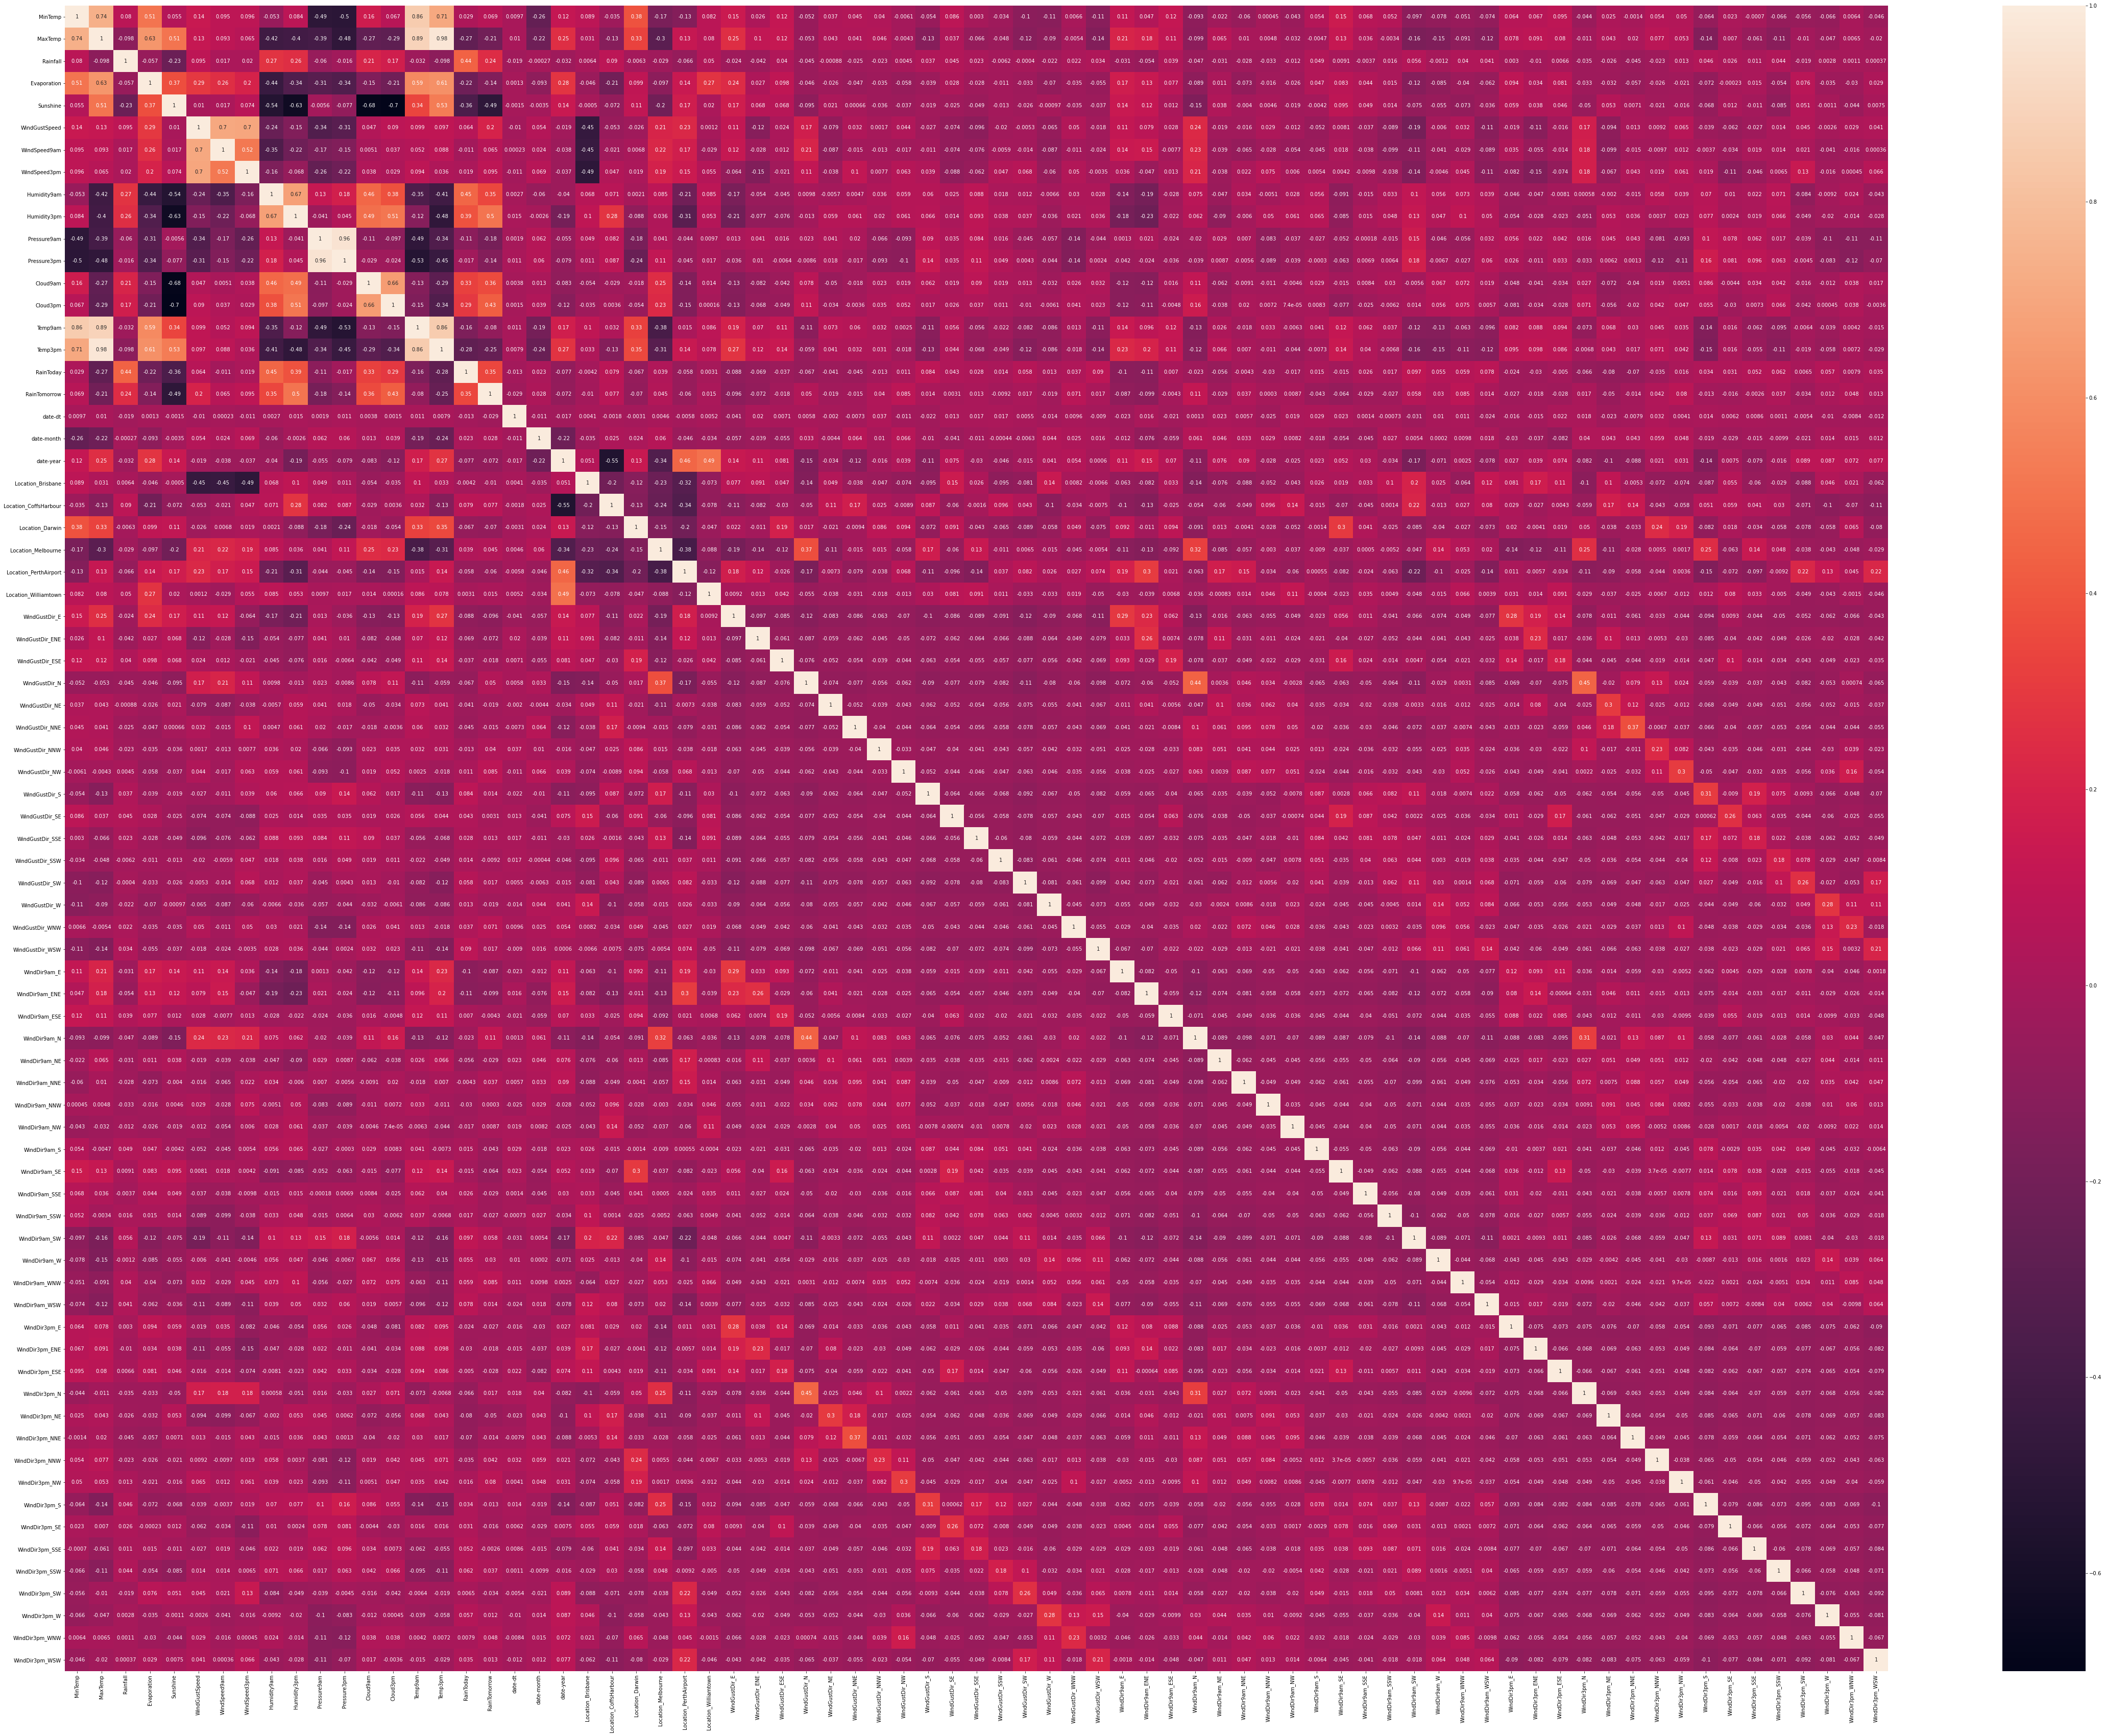

In [31]:
plt.figure(figsize=(80,60))

sns.heatmap(data.corr(),annot=True)

In [32]:
pd.set_option('max_rows',75)
pd.DataFrame(data.corrwith(data['RainTomorrow']),columns=['corr']).sort_values('corr')

,corr
Sunshine,-0.493879
Temp3pm,-0.253043
MaxTemp,-0.206074
Pressure9am,-0.182285
Evaporation,-0.135921
Pressure3pm,-0.135326
WindDir9am_ENE,-0.098704
WindGustDir_E,-0.096139
WindDir9am_E,-0.087027
Temp9am,-0.079839


In [33]:
pd.DataFrame(data.corrwith(data['RainToday']),columns=['corr']).sort_values('corr')

,corr
Sunshine,-0.359338
Temp3pm,-0.277082
MaxTemp,-0.270574
Evaporation,-0.216151
Temp9am,-0.161972
WindDir9am_ENE,-0.110620
Pressure9am,-0.106544
WindDir9am_E,-0.103348
WindGustDir_E,-0.087504
WindDir3pm_NE,-0.080435


<AxesSubplot:xlabel='MaxTemp', ylabel='Temp3pm'>

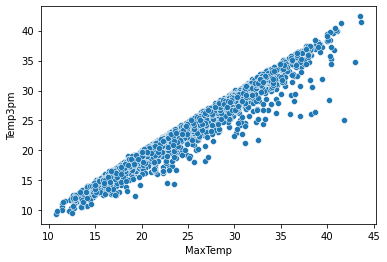

In [34]:
sns.scatterplot(data['MaxTemp'],data['Temp3pm'])

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

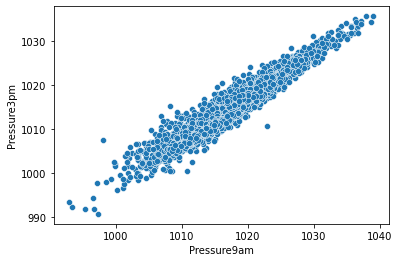

In [35]:
sns.scatterplot(data['Pressure9am'],data['Pressure3pm'])

Removing here 2 features with multicollinearity.
there are many features on which we have very less correlation but in current problem statement there are 2 targets so we found only 1 common feature which have no relation with both targets, so removing it as well.

In [36]:
data.drop(columns=['Pressure9am','Temp3pm','WindDir9am_ESE'],inplace=True)

#### From data overviews it doesn't seems outliers in dataset moreover we will do PCA not testing outliers seperately

### Data Imbalancing Test

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

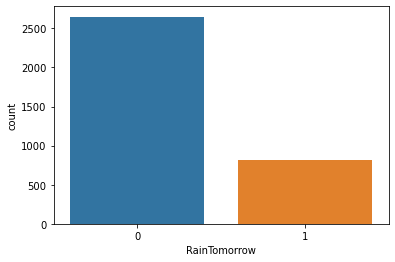

In [37]:
sns.countplot(data['RainTomorrow'])

Data is imbalance so we need to balance it using sampling techniques.

In [38]:
data0=data[data['RainTomorrow']==0]
data1=data[data['RainTomorrow']==1]

In [39]:
from sklearn.utils import resample
upsample=resample(data1,n_samples=2500,random_state=91)
data=pd.concat([upsample,data0],axis=0)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

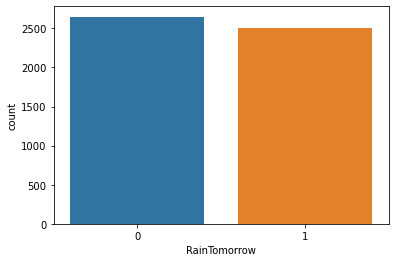

In [40]:
sns.countplot(data['RainTomorrow'])

In [41]:
data.shape

(5149, 72)

### Features Selection

In [42]:
from sklearn.feature_selection import SelectKBest,f_classif

In [43]:
X=data.drop(columns=['RainTomorrow'])
y=data.RainTomorrow

In [44]:
# find out score of each feature using k best
best_feature=SelectKBest(score_func=f_classif,k=70)
fit=best_feature.fit(X,y)

scores=pd.DataFrame(fit.scores_)
scores['feature_name']=X.columns
scores.columns=['score','column_name']
scores.sort_values(by=['score'],ascending=False).reset_index()

,index,score,column_name
0,9,2292.122780,Humidity3pm
1,4,2284.685496,Sunshine
2,12,1854.247264,Cloud3pm
3,11,1217.330925,Cloud9am
4,8,973.638259,Humidity9am
5,14,723.687863,RainToday
6,1,332.993349,MaxTemp
7,5,243.393613,WindGustSpeed
8,2,225.856168,Rainfall
9,3,146.762873,Evaporation


In [45]:
#selecting top 50 features which performing highest.
scores.nlargest(50,'score').column_name
New_X=data[scores.nlargest(50,'score').column_name]
data=pd.concat([New_X,y],axis=1)

### PCA-Dimenstion Reduction

In [46]:
X=data.drop(columns=['RainTomorrow'])
y=data.RainTomorrow

scaler=StandardScaler()
x_scale=scaler.fit_transform(X)

In [47]:
from sklearn.decomposition import PCA

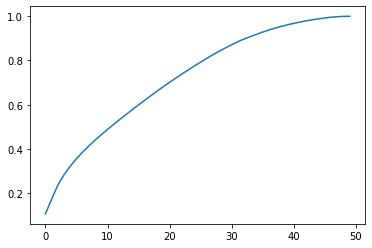

In [48]:
pca=PCA()
pca_components=pca.fit_transform(x_scale)

plt.figure()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

On the basis of above scree plot i will select n_components=40 which are covering almost 90% of variance in data.

In [49]:
pca=PCA(n_components=40)
pca_components=pca.fit_transform(x_scale)

In [50]:
principal_comp=pd.DataFrame(pca_components,columns=[list(range(1,41))])

### Train Test Split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(principal_comp,y,test_size=0.25,random_state=91)

### Model Building

In [52]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
svc=SVC()
gbc=GradientBoostingClassifier()

In [53]:
lr.fit(x_train,y_train)
rfc.fit(x_train,y_train)
svc.fit(x_train,y_train)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [54]:
#training score
print(lr.score(x_train,y_train)*100)
print(rfc.score(x_train,y_train)*100)
print(svc.score(x_train,y_train)*100)
print(gbc.score(x_train,y_train)*100)

80.85988085988086
100.0
91.1939911939912
90.5982905982906


### Evaluation

In [55]:
#lr score

y_pred=lr.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8338509316770186


In [56]:
#rfc score

y_pred=rfc.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.9386645962732919


In [57]:
#svc score

y_pred=svc.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8711180124223602


In [58]:
#gbc score

y_pred=gbc.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8711180124223602


### Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
print('Logistic Regression score:',np.mean(cross_val_score(lr,principal_comp,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfc,principal_comp,y))*100)

print('Gradient Boost score:',np.mean(cross_val_score(gbc,principal_comp,y))*100)

print('svc score:',np.mean(cross_val_score(svc,principal_comp,y))*100)

Logistic Regression score: 67.37284761338655
Random Forest score: 81.95839112343967
Gradient Boost score: 75.4521214865974
svc score: 71.68479153103682


In [61]:
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       653
           1       0.92      0.96      0.94       635

    accuracy                           0.94      1288
   macro avg       0.94      0.94      0.94      1288
weighted avg       0.94      0.94      0.94      1288



### Hyperparameter Tunning

In [62]:
params={'n_estimators':[70,100],
        'criterion':['gini','entropy'],
        'min_samples_split':[1,2],
        'min_samples_leaf':[2,3],
        'max_depth':[10,20]        
        
    
}

grd=GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
grd.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [71]:
rfc=RandomForestClassifier(criterion= 'entropy',
 max_depth= 70,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 90)

rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

94.33229813664596 78


#### After parameter tunning able to achive accuracy score around 95%

### ROC AUC

In [64]:
from sklearn.metrics import plot_roc_curve

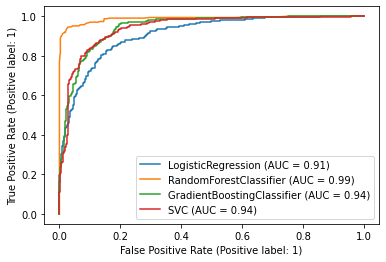

In [65]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

### AUC score for RFC is around 99%

### Final Scoring

In [66]:
confusion_matrix(y_test,y_pred)

array([[599,  54],
       [ 27, 608]], dtype=int64)

In [67]:
print(f1_score(y_test,y_pred))

0.9375481881264457


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       653
           1       0.92      0.96      0.94       635

    accuracy                           0.94      1288
   macro avg       0.94      0.94      0.94      1288
weighted avg       0.94      0.94      0.94      1288



Model performing very well with 95 % accuracy.

For model-2 amount of rain prediction for tomorrow -no target found in data base.

### Model Save

In [69]:
filename='rain_prediction.pickle'
pickle.dump(rfc,open(filename,'wb'))